In [1]:
# -*- coding: utf-8 -*-

In [12]:
from IPython.display import Audio, Image, IFrame
from IPython.display import display
from IPython.display import display_pdf

# Speech pattern discovery and evaluation on the CallHome dataset

## Unsupervised Term Discovery

### Dynamic Time Warping algorithm for detecting repeated speech segments

Speech data is recorded as a time series of signal amplitude (continuous) values. Segmental DTW was proposed by Alex Park et al. as an effective method of extracting patterns from speech data. The repeated terms can be word, sub-word or compound-word like units. In order to use speech data for downstream applications such as: Machine Translation, Query-by-Example, among others, these discovered terms provide a psuedo discrete tokenisation of the continuous data. In this work, we use the Zero Resource Toolkit made available by Aren et al. The toolkit allows us to perform UTD in relativly quick time.

Consider the following two speech inputs:

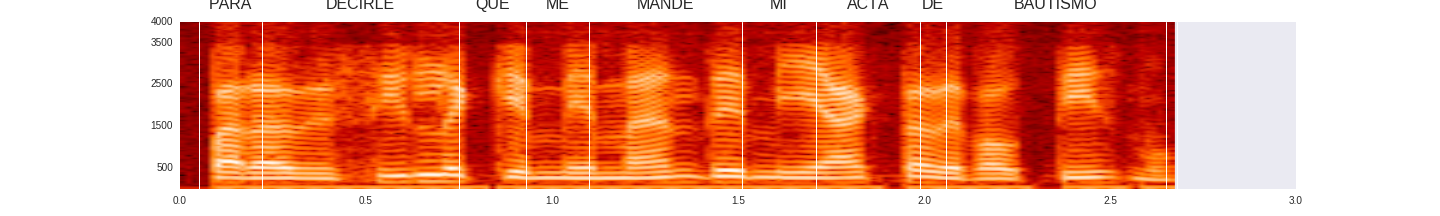

In [16]:
Image("output/bautismo_1761.png")

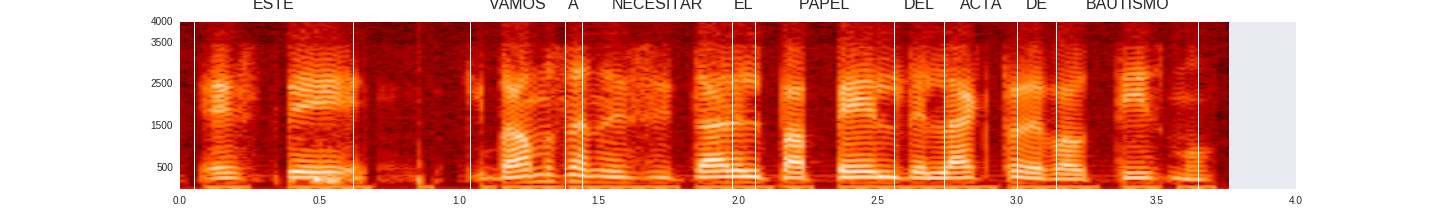

In [17]:
Image("output/bautismo_1762.png")

An acoustic dotplot computed over the MFCC representations of these utterances appears as follows

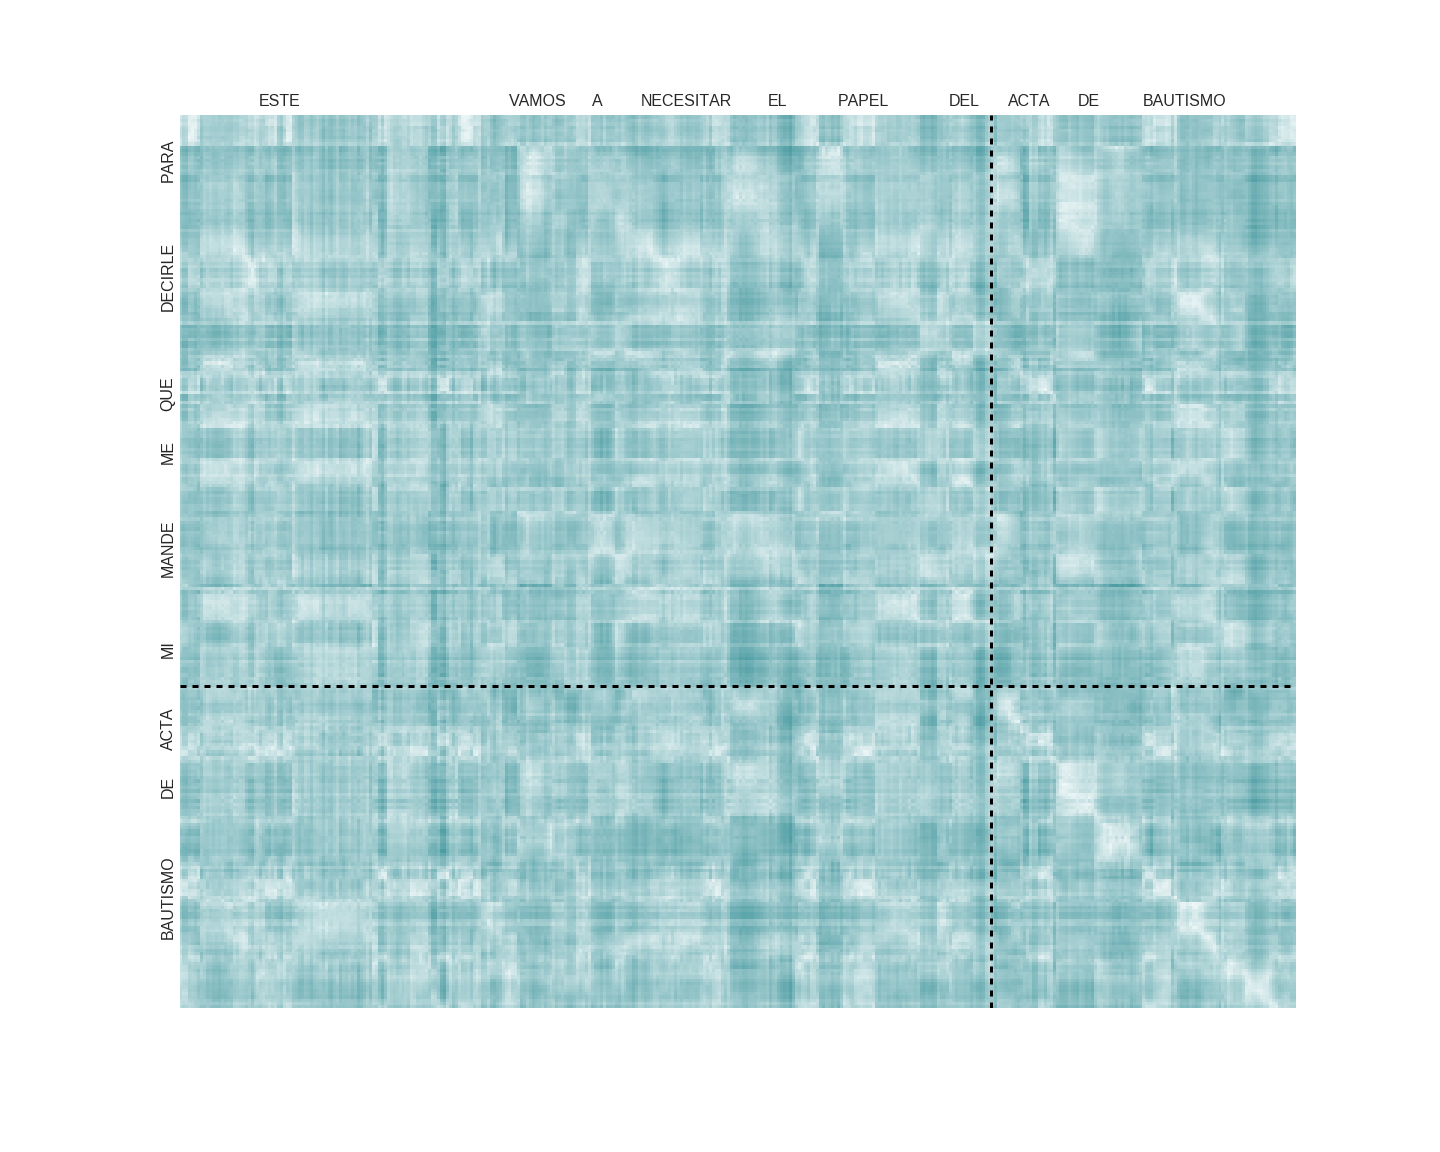

In [18]:
Image("output/dtw_pair_1761_1762.png")

Any diagonal line patterns in an acoustic dotplot signify a common acoustic segment. In this case, we know from the transcripts, that the words are "ACTA DE BAUTISMO". The Zero Resource Toolkit, employs image detection techniques to extract these acoustic segment matches and outputs them as pairs. 

### UTD output

The discovered speech patterns are provided along with the following information:
- Pair id
- Speech segment 1 id, audio file, start and end times
- Speech segment 2 id audio file, start and end times
- A DTW score between 0 and 1.0. A high score indicates a stronger acoustic match

For the example above, this information is as follows:
5119	1763	1764	0.925	MI ACTA DE BAUTISMO	MI ACTA DE BAUTISMO


### UTD output evaluation

We use the Spanish transcriptions to evaluate the UTD output. For each pair of segments which the ZRT outputs as an acoustic match, we retrieve the corresponding words from the transcripts. The retrieved words are then filtered for stop words. A discovered pair is assigned a score of 1, if the two segments have atleast one content word in common, otherwise, the score assigned is 0.


## Experiments

### Experimental setup

We use CALLHOME Spanish corpus, which consists of speech from telephone conversations between native speakers. Using the SPRACHcore (#insert_ref#) software package, we generate 39-dimensional Relative Spectral Transform - Perceptual Linear Prediction (PLP) feature vectors. Each dimension is further mean and variance normalised.

For UTD experiment, we use speech from 20 telephone calls, with a total of 2.70 hours of voice activity. We use a force alignment of the speech input with transcriptions to generate a gold standard and also for determining the voice active regions. For all experiments, we assume that ground truth voice activity information is available. (#insert how to explain gold standard alignments#). To improve the output of the UTD system, we use the English translations provided as part of (#insert_ref#).




TODO (or not todo)

- Suffix array over transcripts to extract gold standard pattern?
- Alternately, extract words longer than 500 ms, and repeated atleast twice, in different utterance ids

Our goal is to quantitavely evaluate the discovered speech pairs. For an intrinsic evaluation, we use the force aligned transcriptions to compute an Average Precision over UTD output. To test extrinsically, we generate a UTD to English translation model and compute precision and recall metrics.

We also attempt to quantify the improvements in UTD output, which can be achieved using additional information, which in this case is English translations. The translations can be considered as a form of noisy label.

### Choosing UTD parameters

| DTW score        | Duration (ms) |  
| ------------- |:-------------:|
| 0.80     | 500 |

UTD systems are sensitive to silent and background speech regions .To eliminate these regions from the discovery process, we use the following two methods for Voice Activity Detection (VAD):
1. VAD information extracted from forced alignment with transcriptions
2. VAD information extracted using an energy detection script

| VAD using force alignment with transcriptions    | VAD using energy detection |  
| :------------- |:-------------|
| Moderately strict filtering | Aggressive filtering. Removes a lot of voice activity regions in addition to silence and background noise |
| Voice Active regions detected = 7 hours out of 8.50 hours |Voice Active regions detected = 2.30 hours out of 8.50 hours |
|Due to imperfect alignments, some silent regions left unfiltered. These lead to invalid UTD output which is difficult to identify | Better quality input data for UTD |



### UTD output

<table>
    <tr>
        <th>Description</th>
        <th># of pairs</th>
    </tr>
    <tr>
        <td>Total pairs</td>
        <td>2173</td>
    </tr>
    <tr>
        <td>With sil, sp, or no matches</td>
        <td>78</td>
    </tr>
    <tr>
        <td>Pairs with speech segments and ES words</td>
        <td>2095</td>
    </tr>
</table>

Example, where acoustic similarity is high, but translation is low:
34	45	46	0.908	DIFíCILES POR EJEMPLO	FILóCTETES POR EJEMPLO P	1	0.857	1	0.092	0.826	1.049.007	1.049.014

## Improving UTD with noisy labels - English translations